# Lorenz attractor

Differential equation

$$
\frac{d\overline{R}}{dt} = 
    \begin{bmatrix}
        \sigma \cdot \left( y - x \right) \\
        -y + x \cdot \left( r - z \right) \\
        -b \cdot z + x \cdot y \\
    \end{bmatrix},
\qquad
\overline{R} =
    \begin{bmatrix}
        x \\ y \\ z
    \end{bmatrix}
$$

## Fixpoints

Assume that
$$
\begin{cases}
    \sigma &>& 0 \\
    b &>& 0 \\
    r &>& 0
\end{cases}
$$

Equation to solve is

$$
\frac{ d \overline{R} }{ dt } =
    \begin{bmatrix}
        0 \\ 0 \\ 0
    \end{bmatrix}
$$
which means

$$
\begin{bmatrix}
        0 \\ 0 \\ 0
\end{bmatrix}
=   \begin{bmatrix}
        \sigma \cdot \left( y - x \right) \\
        -y + x \cdot \left( r - z \right) \\
        -b \cdot z + x \cdot y \\
    \end{bmatrix}
\Longrightarrow
\begin{cases}
    \sigma \cdot \left( y - x \right) &=& 0 \\
    -y + x \cdot \left( r - z \right) &=& 0 \\
    -b \cdot z + x \cdot y &=& 0 \\
\end{cases}
$$

It's obvious that $x = y = p$, where $p$ is some new variable
$$
\begin{cases}
    x = y &=& p \\
    p \cdot \left( r - z - 1 \right) &=& 0 \\
    -b \cdot z + p^2 &=& 0 \\
\end{cases}
$$

### Solutions

When $p = 0$
$$
\begin{cases}
    x &=& 0 \\
    y &=& 0 \\
    z &=& 0
\end{cases}
$$

Otherwise $r - z - 1 = 0$
$$
\begin{cases}
    z &=& r - 1 \\
    p^2 &=& b \cdot z
\end{cases}
\Longrightarrow
\begin{cases}
    z &=& r - 1 \\
    x &=& \pm \sqrt{b \cdot z} \\
    y &=& \pm \sqrt{b \cdot z} \\
\end{cases}
$$

Finally
$$
\begin{cases}
    z &=& r - 1 \\
    x &=& \pm \sqrt{b \cdot \left( r - 1 \right)} \\
    y &=& \pm \sqrt{b \cdot \left( r - 1 \right)}
\end{cases}
$$

## Stability

Fixpoints are
$$
\overline{R}_0 =
\begin{bmatrix}
    \pm \sqrt{b \cdot \left( r - 1 \right)} \\
    \pm \sqrt{b \cdot \left( r - 1 \right)} \\
    r + 1
\end{bmatrix}
$$

Say that $\sqrt{b \cdot \left( r - 1 \right)}$ are multiplied by
some constants $c \in \left\{ -1, 1 \right\}$ to ease further calculations

Also define $k = \sqrt{b \cdot \left( r + 1 \right)}$

$$
\overline{R}_0 =
\begin{bmatrix}
    - c \cdot k \\
    - c \cdot k \\
    r - 1
\end{bmatrix}
$$

Move the center of our coordinates system to these points
$$
\begin{bmatrix}
    x_c \\ y_c \\ z_c
\end{bmatrix}
= \overline{C}
= \overline{R} - \overline{R}_0
= \begin{bmatrix}
    x + c \cdot k \\
    y + c \cdot k \\
    z - r + 1
\end{bmatrix}
$$

### Jacobian

Here is Jacoby matrix of original equation
$$
J = \begin{bmatrix}
    -\sigma, &\sigma, &0 \\
    r - z, &-1, &-x \\
    y, &x, &-b \\
\end{bmatrix}
$$

Replace values by stable points
$$
J' = \begin{bmatrix}
    -\sigma, &\sigma, &0 \\
    1, &-1, &-c \cdot k \\
    c \cdot k, &c \cdot k, &-b \\
\end{bmatrix}
$$

### Solution

$$
0 =
\begin{vmatrix}
    -\sigma - \lambda, &\sigma, &0 \\
    1, &- 1 - \lambda, &- c \cdot k \\
    c \cdot k, &c \cdot k, &-b - \lambda \\
\end{vmatrix}
$$

We have an equation for $\lambda$
$$
\lambda^3
+ \lambda^2 \cdot \left( 1 + b + \sigma \right)
+ \lambda \cdot b \cdot \left( \sigma + r \right)
+ 2 \cdot \sigma \cdot b \cdot \left( r -1 \right)
= 0
$$

Finally
$$
r_c = \frac{\sigma \cdot \left( \sigma + b + 3 \right)}{\sigma - b - 1}
$$

## Phase volume

Need to calculate
$$
\frac{1}{V} \cdot \frac{dV}{dt} = ?, \qquad V = x \cdot y \cdot z
$$

According to Liouville theorem
$$
\frac{1}{V} \cdot \frac{dV}{dt}
= \overline{\nabla} \cdot \overline{R}
= - \left( \sigma + 1 + b \right)
$$

This means that phase volume shrinks exponentially and the system is dissipative

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
T = 10
dt = 0.01
STEPS = int(T/dt)

In [3]:
S = 10.
B = 8./3

In [4]:
R_C = S * (S + B + 3) / (S - B - 1)
R_L = R_C * .5
R_G = R_C * 2

In [5]:
def lorenz(x, y, z, r=R_C, s=S, b=B):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [6]:
# Need one more for the initial values
xs = np.empty((STEPS + 1,))
ys = np.empty((STEPS + 1,))
zs = np.empty((STEPS + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (2., -1., 0.)

In [7]:
# Stepping through "time".
for i in range(STEPS):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], r=R_C)
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

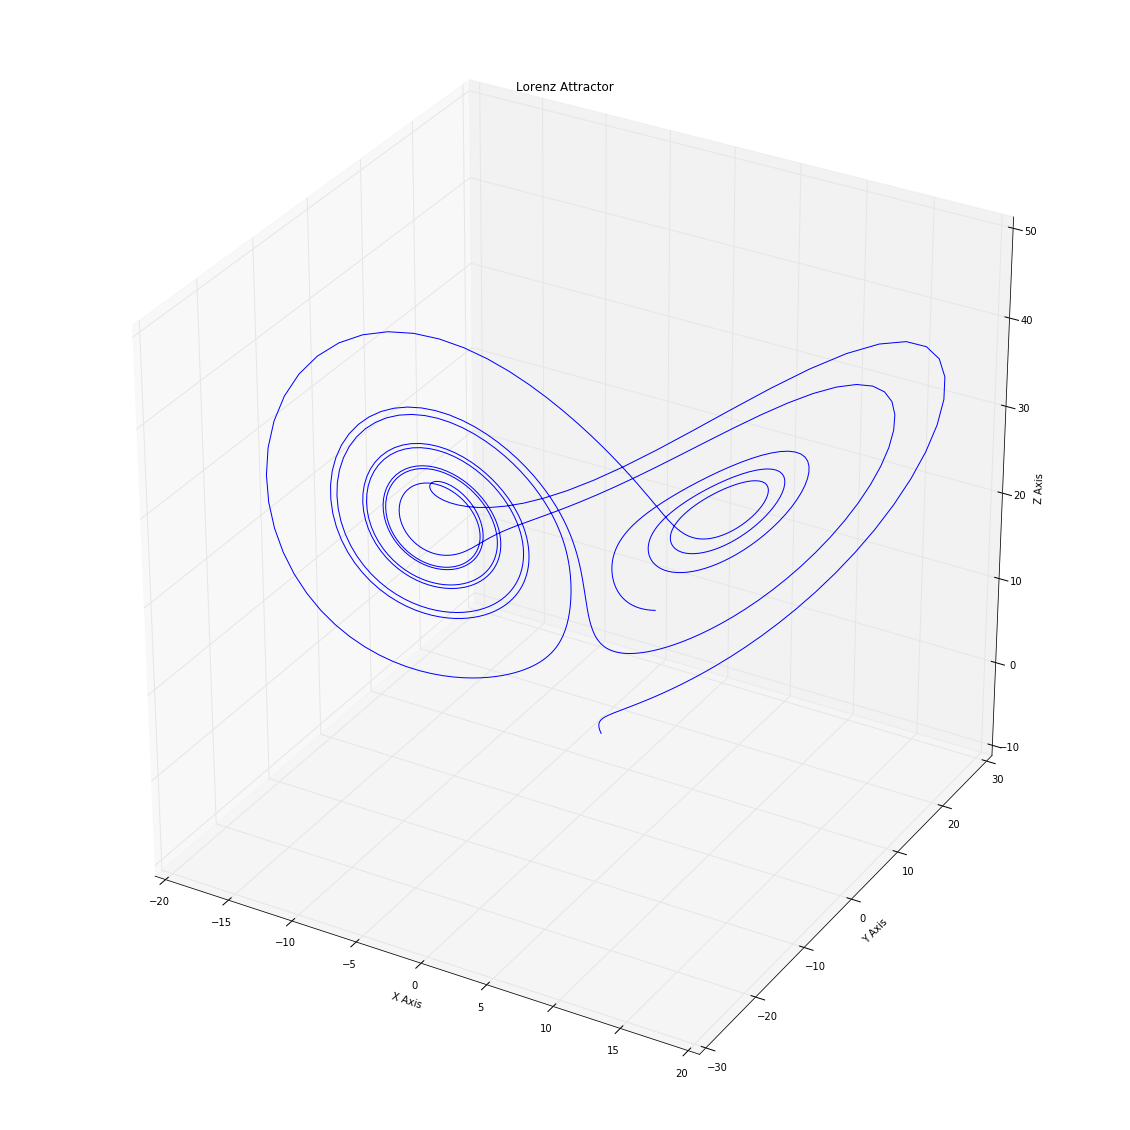

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()